In [1]:
# imports

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os

from src.utils import sulamerica 

In [2]:
# import module with functions for the analysis, load data and do first cleaninf
sl = sulamerica.Sulamerica()

df = sl.read_data('../data/cases_internacao_SUS.xls')
df = sl.rename_data(df)
df = df[df['AIH_aprovadas']>0]

df.head()

,Região/Unidade da Federação,Internações,AIH_aprovadas,Valor_total,Valor_serviços_hospitalares,Val_serv_hosp_-_compl_federal,Val_serv_hosp_-_compl_gestor,Valor_serviços_profissionais,Val_serv_prof_-_compl_federal,Val_serv_prof_-_compl_gestor,Valor_médio_AIH,Valor_médio_intern,Dias_permanência,Média_permanência,Óbitos,Taxa_mortalidade,sheet_name,period,Regiao
0,Região Norte,75363.0,75363.0,65821821.59,50592273.10,282125,-,14820122.53,-,-,873.40,873.40,358202.0,4.8,2149.0,2.85,jul19,2019-07,NORTE_TOTAL
1,Rondônia,9603.0,9603.0,9404751.41,7666945.90,-,-,1737805.51,-,-,979.36,979.36,53043.0,5.5,315.0,3.28,jul19,2019-07,NORTE
2,Amazonas,16248.0,16248.0,15624312.73,12166634.07,1221.31,-,3455637.92,-,-,961.61,961.61,85512.0,5.3,536.0,3.30,jul19,2019-07,NORTE
3,Roraima,4324.0,4324.0,3137537.40,2356231.68,-,-,781305.72,-,-,725.61,725.61,25560.0,5.9,171.0,3.95,jul19,2019-07,NORTE
4,Pará,34774.0,34774.0,28178633.44,21241354.07,248197,-,6581738.70,-,-,810.34,810.34,138135.0,4.0,832.0,2.39,jul19,2019-07,NORTE


In [3]:
df.dtypes

Região/Unidade da Federação       object
Internações                      float64
AIH_aprovadas                    float64
Valor_total                      float64
Valor_serviços_hospitalares      float64
Val_serv_hosp_-_compl_federal     object
Val_serv_hosp_-_compl_gestor      object
Valor_serviços_profissionais     float64
Val_serv_prof_-_compl_federal     object
Val_serv_prof_-_compl_gestor      object
Valor_médio_AIH                  float64
Valor_médio_intern               float64
Dias_permanência                 float64
Média_permanência                float64
Óbitos                           float64
Taxa_mortalidade                 float64
sheet_name                        object
period                            object
Regiao                            object
dtype: object

In [4]:
# transform some variables to correct type
df['Val_serv_hosp_-_compl_federal'] = pd.to_numeric(df['Val_serv_hosp_-_compl_federal'], errors='coerce')
df['Val_serv_hosp_-_compl_gestor'] = pd.to_numeric(df['Val_serv_hosp_-_compl_gestor'], errors='coerce')

df['Val_serv_prof_-_compl_federal'] = pd.to_numeric(df['Val_serv_prof_-_compl_federal'], errors='coerce')
df['Val_serv_prof_-_compl_gestor'] = pd.to_numeric(df['Val_serv_prof_-_compl_gestor'], errors='coerce')
df = df.fillna(0)

In [5]:
#add some variables and keep only relevant ones
df['hospitalar_total'] = (df['Valor_serviços_hospitalares'] + df['Val_serv_hosp_-_compl_federal'] + df['Valor_serviços_hospitalares'])
df['servicos_total'] = (df['Val_serv_prof_-_compl_federal'] + df['Val_serv_prof_-_compl_gestor'] + df['Valor_serviços_profissionais'])
df['calculado_total'] = df['hospitalar_total'] + df['servicos_total']
df['percentual_servicos'] = df['servicos_total'] / df['calculado_total']
df['percentual_hospitalar'] = df['hospitalar_total'] / df['calculado_total']
df = df[['period', 'Região/Unidade da Federação', 'Internações', 'AIH_aprovadas',
       'Valor_total', 'Valor_médio_AIH', 'Valor_médio_intern',
       'Dias_permanência', 'Média_permanência', 'Óbitos', 'Taxa_mortalidade',
        'Regiao', 'hospitalar_total', 'servicos_total',
       'calculado_total', 'percentual_servicos', 'percentual_hospitalar']]


In [6]:
df.columns

Index(['period', 'Região/Unidade da Federação', 'Internações', 'AIH_aprovadas',
       'Valor_total', 'Valor_médio_AIH', 'Valor_médio_intern',
       'Dias_permanência', 'Média_permanência', 'Óbitos', 'Taxa_mortalidade',
       'Regiao', 'hospitalar_total', 'servicos_total', 'calculado_total',
       'percentual_servicos', 'percentual_hospitalar'],
      dtype='object')

# EDA

O primeiro passo será conduzir uma análise exploratória para observar o comportamento das variáveis e extrair alguns insights.
A primeira coisa que vamos fazer é um sanity check para ver se não temos nenhum dados faltando e depois explorar a evolução das principais variáveis no período e tentar entender se existe alguma .


In [7]:
df['period'].sort_values().value_counts()

2019-06    33
2018-05    33
2019-01    33
2017-12    33
2018-12    33
2018-08    33
2018-11    33
2019-04    33
2018-07    33
2018-04    33
2018-03    33
2018-09    33
2019-02    33
2019-07    32
Name: period, dtype: int64

In [8]:
df['Região/Unidade da Federação'].value_counts()

Tocantins              14
São Paulo              14
Santa Catarina         14
Região Norte           14
Bahia                  14
Paraíba                14
Amapá                  14
Amazonas               14
Rio Grande do Norte    14
Região Sudeste         14
Roraima                14
Piauí                  14
Maranhão               14
Paraná                 14
Região Nordeste        14
Rio de Janeiro         14
Goiás                  14
Minas Gerais           14
Pernambuco             14
Rondônia               14
Distrito Federal       14
Mato Grosso            14
Rio Grande do Sul      14
Região Centro-Oeste    14
Pará                   14
Região Sul             14
Sergipe                14
Espírito Santo         14
Mato Grosso do Sul     14
Total                  14
Alagoas                14
Ceará                  14
Acre                   13
Name: Região/Unidade da Federação, dtype: int64

In [9]:
df['period'].sort_values().unique()

array(['2017-12', '2018-03', '2018-04', '2018-05', '2018-07', '2018-08',
       '2018-09', '2018-11', '2018-12', '2019-01', '2019-02', '2019-04',
       '2019-06', '2019-07'], dtype=object)

Como podemos ver esta faltando uma observação para o Estado do Acre no período 2019-07. Dessa forma sabemos que o valor das variáveis da região norte para o período estão subestimados (no caso de variáveis absolutas e.g. internações, valores e etc.). Também podemos ver que temos diversos períodos faltando, de forma que para que seja possível estimar um modelo, teremos que inputar esses períodos.

Agora Vamos ver a evolução de algumas variáveis. Primeiro vamos olhas em um nível mais macro.

In [10]:
df = sl.add_period_data(df)

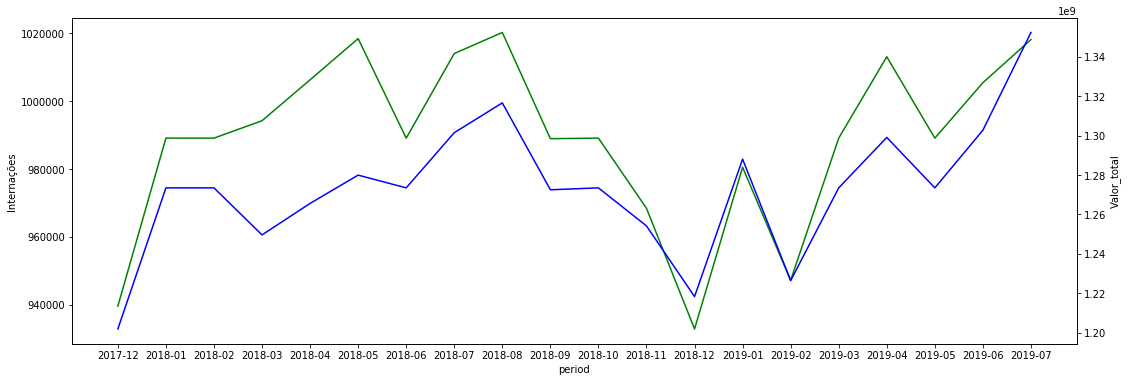

In [11]:

temp_df = df[df['Região/Unidade da Federação']=='Total'].sort_values(by=['period'])

temp_df['Internações'] = temp_df['Internações'].fillna((temp_df['Internações'].mean()))
temp_df['Valor_total'] = temp_df['Valor_total'].fillna((temp_df['Valor_total'].mean()))


plt.figure(figsize=(18, 6))
sns.lineplot(x='period', y='Internações', data=temp_df, sort=True, color='g')
ax2 = plt.twinx()
sns.lineplot(x='period', y='Valor_total', data=temp_df,  ax=ax2, sort=True, color='b');


Como esperado existe uma correlação positiva entre o número total de internações e o valor total gasto.


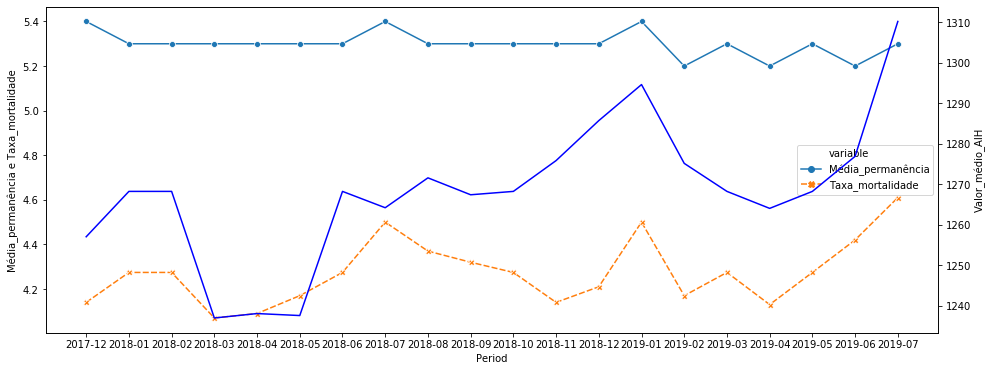

In [12]:
plt.figure(figsize=(16, 6))

temp_df['Média_permanência'] = temp_df['Média_permanência'].fillna((temp_df['Média_permanência'].mean()))
temp_df['Taxa_mortalidade'] = temp_df['Taxa_mortalidade'].fillna((temp_df['Taxa_mortalidade'].mean()))
temp_df['Valor_médio_AIH'] = temp_df['Valor_médio_AIH'].fillna((temp_df['Valor_médio_AIH'].mean()))


melt_df = pd.melt(temp_df, id_vars=['Regiao', 'period'], value_vars=['Média_permanência', 'Taxa_mortalidade']) 
ax = sns.lineplot(x='period', y='value', data=melt_df, sort=True, hue='variable', markers=True,style="variable")
ax.set(xlabel='Period', ylabel='Média_permanência e Taxa_mortalidade')
ax2 = plt.twinx()
sns.lineplot(x='period', y='Valor_médio_AIH', data=temp_df,  ax=ax2, sort=True, color='b', markers=True);

A taxa de mortalidade aparentemente vem crescendo levemente. É interessante observar que ocorreu uma queda na média de permanência, especialmente apartir de 2019-02. Outro fato interessante é que mesmo com uma queda na média de permanência o valor médio da AIH vem aumentando constantemente. Pode ser que a composição dos custos (serviços e hospitalar) tenha mudado... Mas, como mostrado no gráfico abaixo, eles permaneceram relativamente constantes no período analisado.

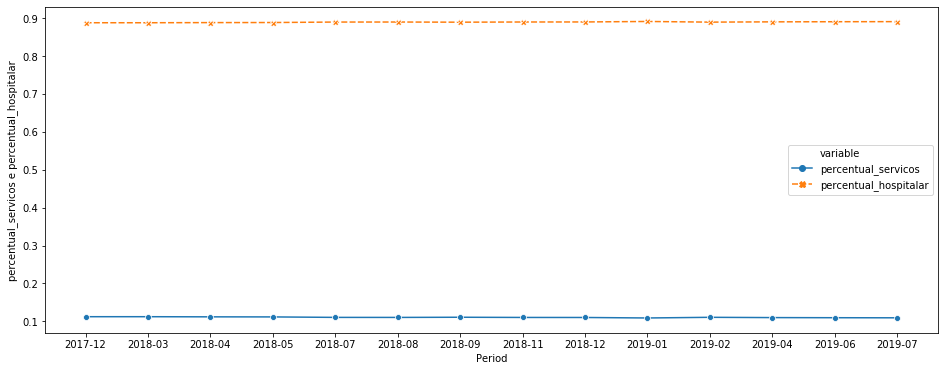

In [13]:
plt.figure(figsize=(16, 6))

melt_df = pd.melt(temp_df, id_vars=['Regiao', 'period'], value_vars=['percentual_servicos', 'percentual_hospitalar'])
ax = sns.lineplot(x='period', y='value', data=melt_df, sort=True, hue='variable', markers=True, style="variable")
ax.set(xlabel='Period', ylabel='percentual_servicos e percentual_hospitalar');


Para entender melhor vamos avaliar os dados por região.

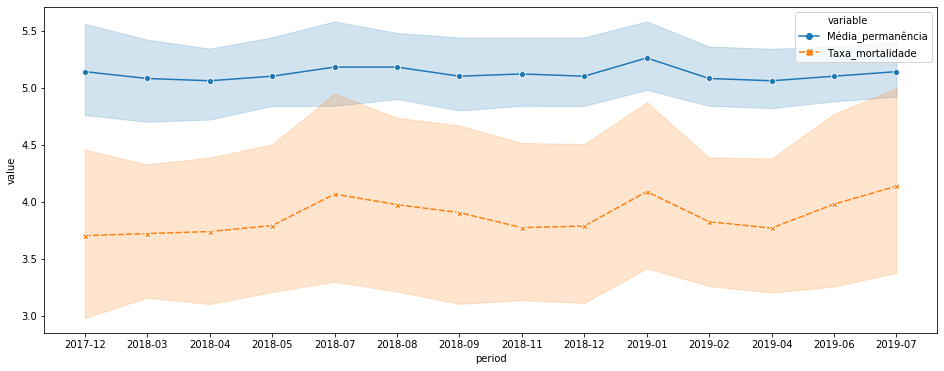

In [14]:
temp_df = df[df['Regiao'].str.contains("_TOTAL",na=False)].sort_values(by=['period'])
melt_df = pd.melt(temp_df, id_vars=['Regiao', 'period'], value_vars=['Média_permanência', 'Taxa_mortalidade'])
plt.figure(figsize=(16, 6))
sns.lineplot(x='period', y='value', data=melt_df, sort=True, hue='variable', markers=True,style="variable");


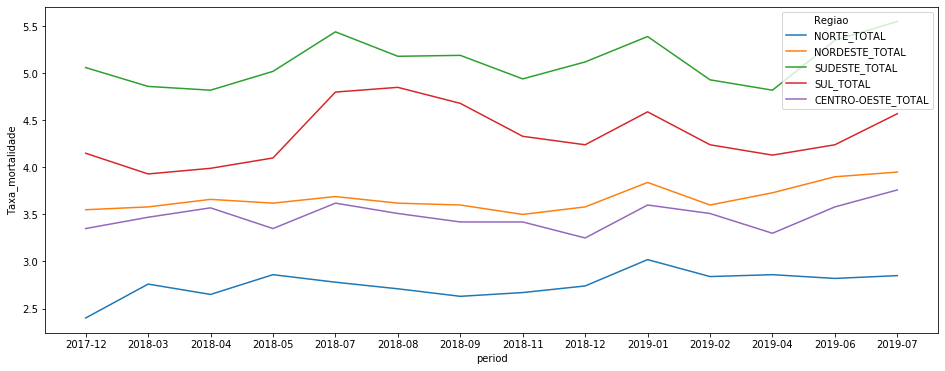

In [15]:
plt.figure(figsize=(16, 6))
sns.lineplot(x='period', y='Taxa_mortalidade', data=temp_df, sort=True, hue='Regiao', markers=True);

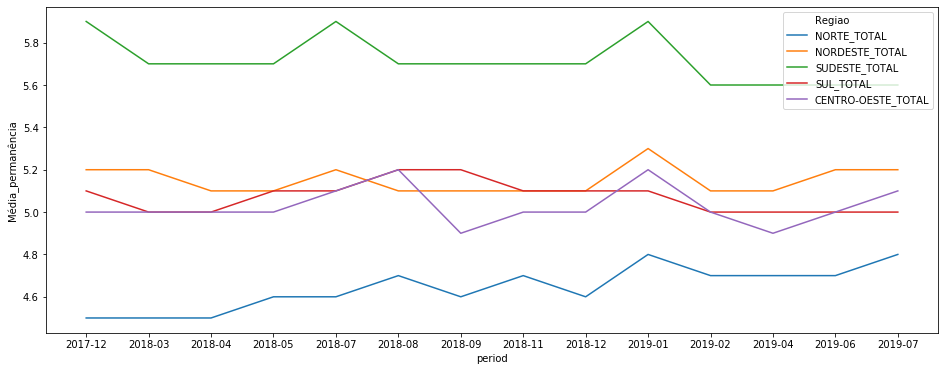

In [16]:
plt.figure(figsize=(16, 6))
sns.lineplot(x='period', y='Média_permanência', data=temp_df, sort=True, hue='Regiao', markers=True);

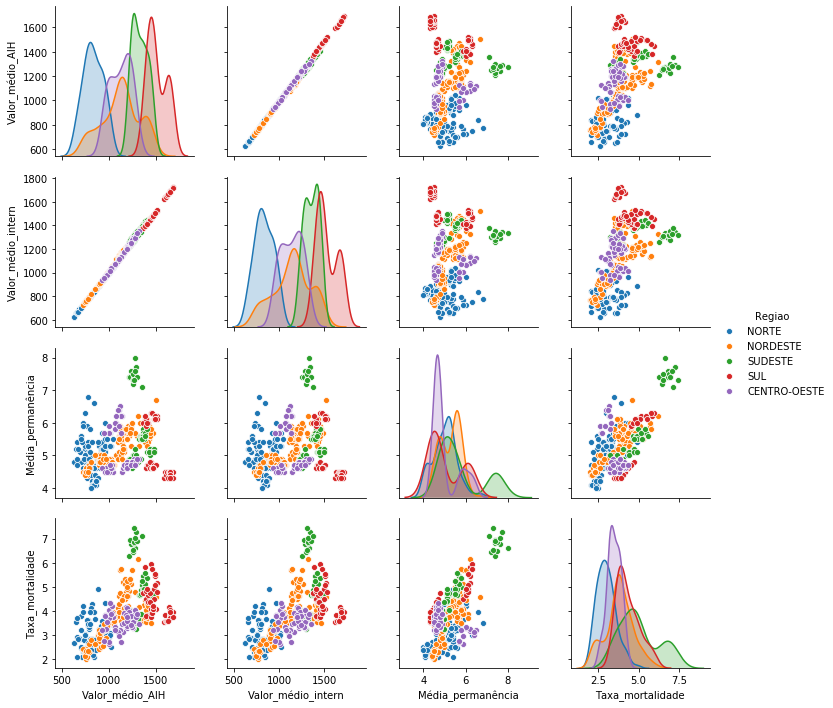

In [17]:
temp_df = df[['Regiao','Valor_médio_AIH', 'Valor_médio_intern',
              'Média_permanência','Taxa_mortalidade']]
temp_df = temp_df[~temp_df['Regiao'].str.contains("TOTAL", na=False)].dropna()
sns.pairplot(data=temp_df, hue='Regiao');

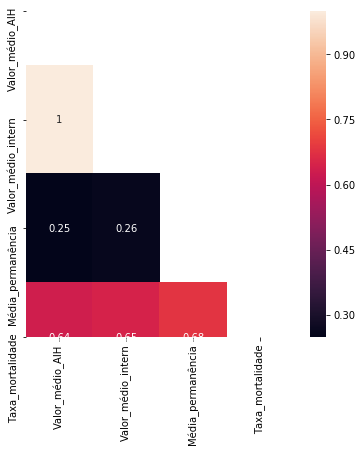

In [18]:
temp_df = df[['Valor_médio_AIH', 'Valor_médio_intern',
              'Média_permanência','Taxa_mortalidade']]

fig, ax = plt.subplots(figsize=(6, 6)) 
mask = np.zeros_like(temp_df.corr())
mask[np.triu_indices_from(mask)] = 1
sns.heatmap(temp_df.corr(), mask= mask, ax = ax,  annot= True);
#sns.heatmap(temp_df.corr());

Como podemos ver o comportamento entre as regiões é bem diferente, tanto em nível como em tendência. Tal fato indica que talvez seja melhor trabalhar com as séries desagregadas (a nível UF), principalmente para imputar os dados para os períodos que não estão na base.
É possível ver que dentro das regiões também existem comportamentos muito distinto.

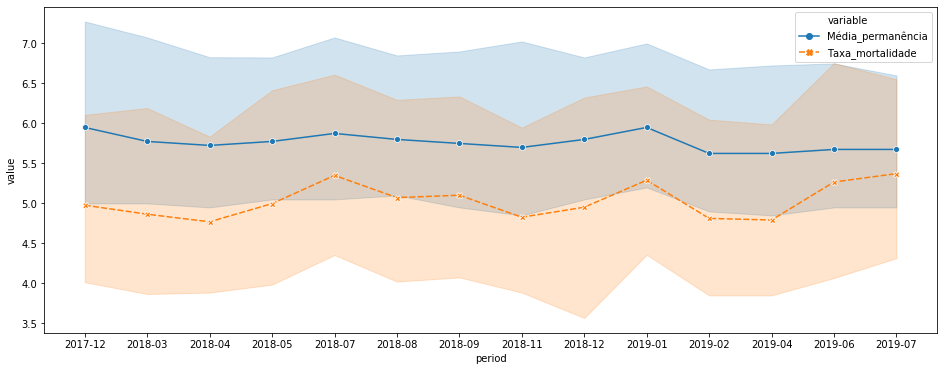

In [19]:
temp_df = df[df['Regiao']=='SUDESTE'].sort_values(by=['period'])
melt_df = pd.melt(temp_df, id_vars=['Regiao', 'period'], value_vars=['Média_permanência', 'Taxa_mortalidade'])
plt.figure(figsize=(16, 6))
sns.lineplot(x='period', y='value', data=melt_df, sort=True, hue='variable', markers=True,style="variable");

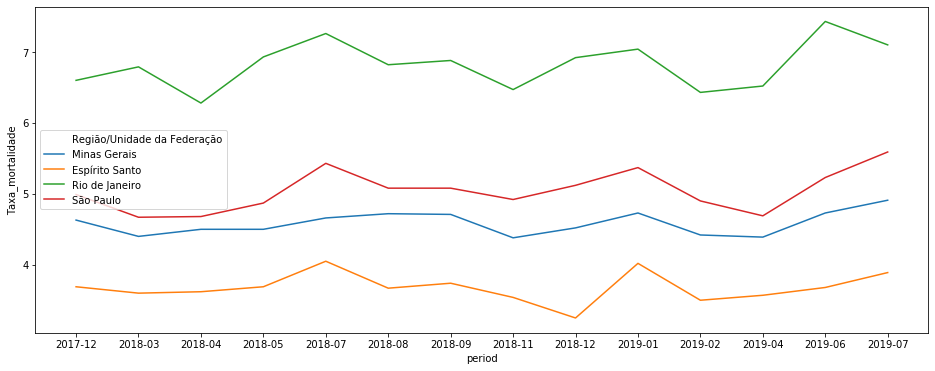

In [20]:
plt.figure(figsize=(16, 6))
sns.lineplot(x='period', y='Taxa_mortalidade', data=temp_df, sort=True, hue='Região/Unidade da Federação', markers=True);

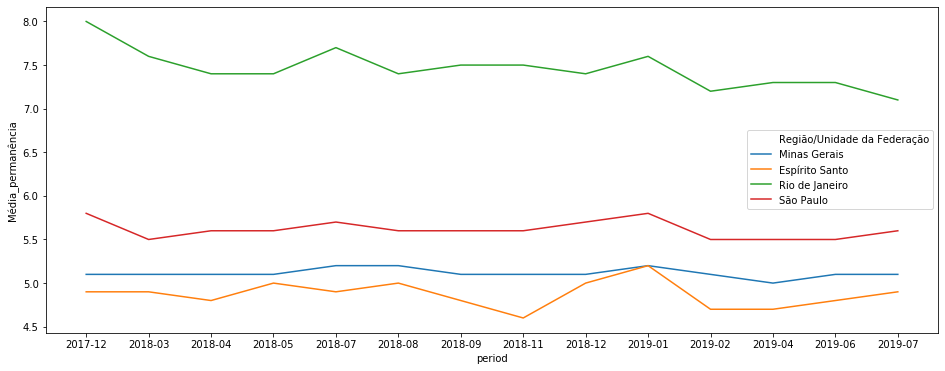

In [21]:
plt.figure(figsize=(16, 6))
sns.lineplot(x='period', y='Média_permanência',
             data=temp_df, sort=True,
             hue='Região/Unidade da Federação', markers=True);

# Impute Missing Values
A EDA nos mostrou que as séries de região e UF são muito diferentes (tanto em nível quanto em comportamento). Por isso vamos imputar os dados faltante a nível UF e depois agregar os mesmos para nível região e total.

Quanto a metodologia para realizar o input dos dados faltantes, é importante levar em conta o fator temporal. Sendo assim o ideal seria usar um metodologia que levasse em conta fatores como a sazonalidade e a tendência das séries. Nesse sentido um fator limitante nessa análise é o baixo número de períodos, o que torna inviável estimar/entender o comportamento sazonal. Caso tivessemos mais observações (ou mesmo um modelo estrutural) poderiamos realizar utilizar um filtro de kalman para preencher as observações faltantes. Realizar mean/median imputation não é o ideal nesse caso, justamente por causa que algumas séries possuem tendência e ,aparentemente, sazonalidade. Dado o contexto do problema e as restrições vamos realizar o input dos dados faltantes usando interpolação.

In [22]:
temp_df = df[['Região/Unidade da Federação','period', 'Internações', 
              'AIH_aprovadas','Valor_total', 'Valor_médio_AIH', 
              'Dias_permanência', 'Óbitos', 'hospitalar_total', 'servicos_total']]
recon_df = sl.reconstruct_data(temp_df)

In [23]:
recon_df.head(20)

,Região/Unidade da Federação,period,Internações,AIH_aprovadas,Valor_total,Valor_médio_AIH,Dias_permanência,Óbitos,hospitalar_total,servicos_total,Regiao
20,Acre,2017-12,3463.000000,3487.000000,2610454.550,748.620000,16660.0,106.0,3.932617e+06,644145.900000,NORTE
21,Acre,2018-01,3421.666667,3438.333333,2607781.150,758.726667,16323.0,101.0,3.943611e+06,635975.643333,NORTE
22,Acre,2018-02,3380.333333,3389.666667,2605107.750,768.833333,15986.0,96.0,3.954605e+06,627805.386667,NORTE
23,Acre,2018-03,3339.000000,3341.000000,2602434.350,778.940000,15649.0,91.0,3.965598e+06,619635.130000,NORTE
24,Acre,2018-04,4237.000000,4252.000000,3064163.420,720.640000,19446.0,97.0,4.608375e+06,759975.800000,NORTE
25,Acre,2018-05,3309.000000,3339.000000,2276236.690,681.710000,15859.0,95.0,3.416581e+06,567946.020000,NORTE
26,Acre,2018-06,3625.000000,3648.500000,2701333.285,735.805000,17968.5,111.5,4.108055e+06,647305.695000,NORTE
27,Acre,2018-07,3941.000000,3958.000000,3126429.880,789.900000,20078.0,128.0,4.799529e+06,726665.370000,NORTE
28,Acre,2018-08,3982.000000,4000.000000,2998865.510,749.720000,20032.0,117.0,4.571892e+06,712919.260000,NORTE
29,Acre,2018-09,3698.000000,3709.000000,2619709.860,706.310000,17772.0,140.0,4.023592e+06,607913.890000,NORTE


In [24]:
total_df = recon_df.groupby(['period']).sum().reset_index().sort_values(by=['period'])
total_df['Taxa_mortalidade'] = (total_df['Óbitos']/total_df['Internações'])*100
total_df['calculado_total'] = total_df['servicos_total']+total_df['hospitalar_total']
total_df['media_permanencia'] = total_df['Dias_permanência']/total_df['Internações']
total_df.head()

,period,Internações,AIH_aprovadas,Valor_total,Valor_médio_AIH,Dias_permanência,Óbitos,hospitalar_total,servicos_total,Taxa_mortalidade,calculado_total,media_permanencia
0,2017-12,939601.0,9.560650e+05,1.201828e+09,29946.170000,5.049429e+06,38881.000000,1.906418e+09,2.414567e+08,4.138033,2.147875e+09,5.374014
1,2018-01,957808.0,9.740957e+05,1.217742e+09,29902.183333,5.111821e+06,39417.333333,1.932995e+09,2.448244e+08,4.115369,2.177820e+09,5.336999
2,2018-02,976015.0,9.921263e+05,1.233657e+09,29858.196667,5.174212e+06,39953.666667,1.959573e+09,2.481921e+08,4.093550,2.207765e+09,5.301366
3,2018-03,994222.0,1.010157e+06,1.249571e+09,29814.210000,5.236604e+06,40490.000000,1.986150e+09,2.515599e+08,4.072531,2.237710e+09,5.267037
4,2018-04,1006271.0,1.022183e+06,1.265569e+09,29696.010000,5.305641e+06,41111.000000,2.013321e+09,2.540640e+08,4.085480,2.267385e+09,5.272577


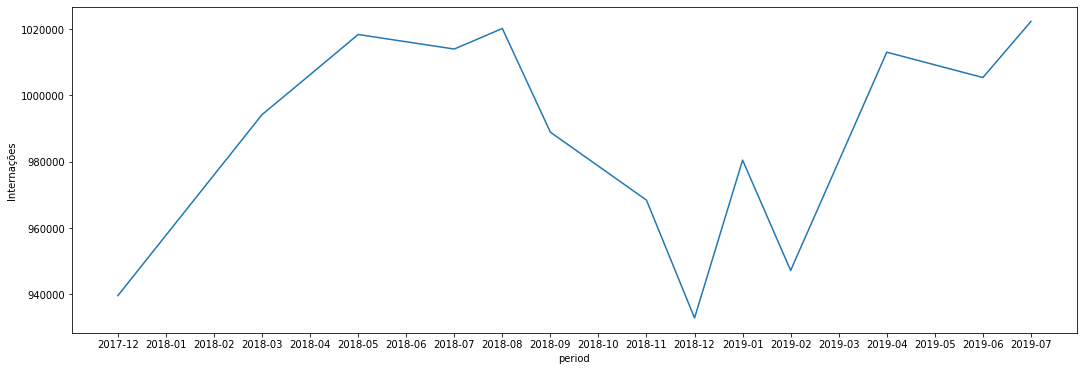

In [25]:
plt.figure(figsize=(18, 6))
sns.lineplot(x='period', y='Internações',
             data=total_df, sort=True,
             markers=True);

In [26]:
regiao_df = recon_df.groupby(['period','Regiao']).sum().reset_index()
regiao_df['Taxa_mortalidade'] = (regiao_df['Óbitos']/regiao_df['Internações'])*100
regiao_df['calculado_total'] = regiao_df['servicos_total']+regiao_df['hospitalar_total']
regiao_df['media_permanencia'] = regiao_df['Dias_permanência']/regiao_df['Internações']
regiao_df.head()

,period,Regiao,Internações,AIH_aprovadas,Valor_total,Valor_médio_AIH,Dias_permanência,Óbitos,hospitalar_total,servicos_total,Taxa_mortalidade,calculado_total,media_permanencia
0,2017-12,CENTRO-OESTE,70277.0,71141.0,8.148492e+07,4487.30,353017.0,2354.0,1.290510e+08,16323532.13,3.349602,1.453746e+08,5.023222
1,2017-12,NORDESTE,249821.0,253377.0,2.813121e+08,10128.59,1301639.0,8859.0,4.376772e+08,61419400.26,3.546139,4.990966e+08,5.210287
2,2017-12,NORTE,80359.0,80383.0,6.726731e+07,5610.02,358295.0,1929.0,1.020220e+08,15702065.31,2.400478,1.177241e+08,4.458679
3,2017-12,SUDESTE,370247.0,380182.0,5.195994e+08,5343.47,2181114.0,18727.0,8.320872e+08,99740037.66,5.057975,9.318273e+08,5.890970
4,2017-12,SUL,168897.0,170982.0,2.521644e+08,4376.79,855364.0,7012.0,4.055805e+08,48271662.89,4.151643,4.538522e+08,5.064412


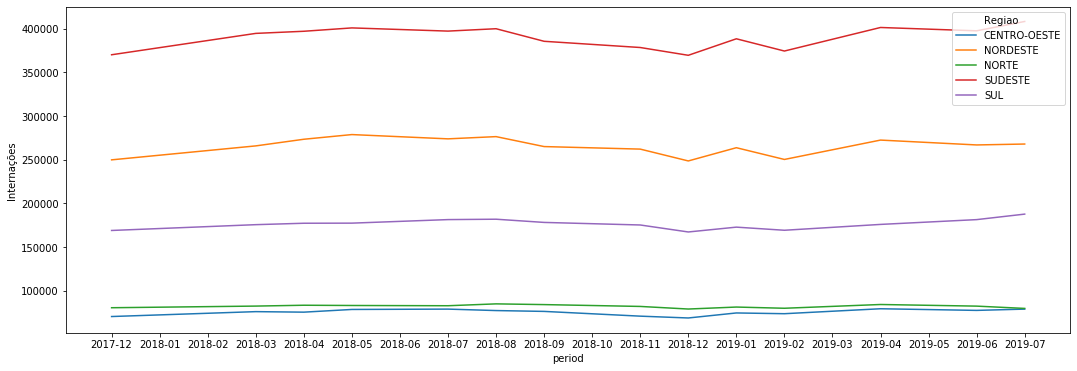

In [27]:
plt.figure(figsize=(18, 6))
sns.lineplot(x='period', y='Internações',
             data=regiao_df, sort=True,
             hue = 'Regiao', markers=True);

# Model
Para a parte de previsão, vamos usar modelos de série temporal, em especial Modelos de suavização exponencial e modelos do tipo ARIMA. Um ponto importante é testar o poder preditivo do modelo, no caso de séries de tempo a cross-validação tem que levar em conta o aspecto temporal. Sendo assim o ideal seria implementar uma cross-validaçãocom rolling window. Como a amostra que estamos trabalhando é pequena, iremos testar o poder de previsão dos modelos para apenas 2 períodos. Sendo assim, nossa base de teste será os dois últimos períodos da série de tempo.

In [60]:
#model imports
#a) as Internações, b) o número de Óbitos e c) o Valor Médio de AIH pelos próximos 6 meses.

import warnings                                 
warnings.filterwarnings('ignore')

from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.api as sm

from pmdarima import model_selection

In [106]:
#Select only variables that will be forecasted
X =  total_df[['period','Internações','Óbitos','Valor_médio_AIH']].set_index('period')
# create X_train and X_test (holdout sample for test model performance)
X_train, X_test = sl.ts_train_test_split(X, 2)

## Internações

Vamos começar modelando a série de internações. Primeiro vamos estimar um modelo ARIMA e depois modelos de suavização exponencial.

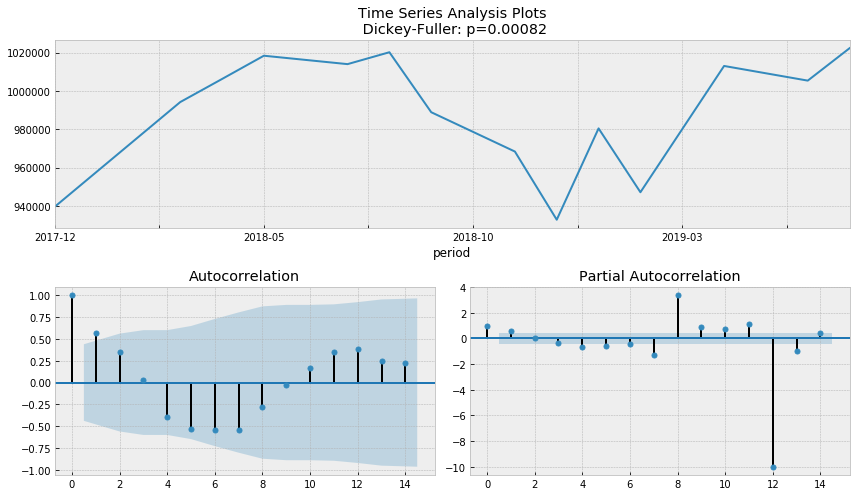

In [62]:
# ARIMA Model for Internações
y=X['Internações']
sl.tsplot(y=y, lags=14)

Os gráficos acimas nos ajudarão a construir o modelo ARIMA. Primeiramente, vemos que o valor do teste ADF rejeita a hipótese nula de presença de raiz unitária, nosso modelo terá o valor do parâmetro I(0). Os valores dos parâmetros AR e MA depende da ACF e PACF (os dois gŕaficos na parte de baixo). O comportamento senoidal da ACF e o fato da PACF.

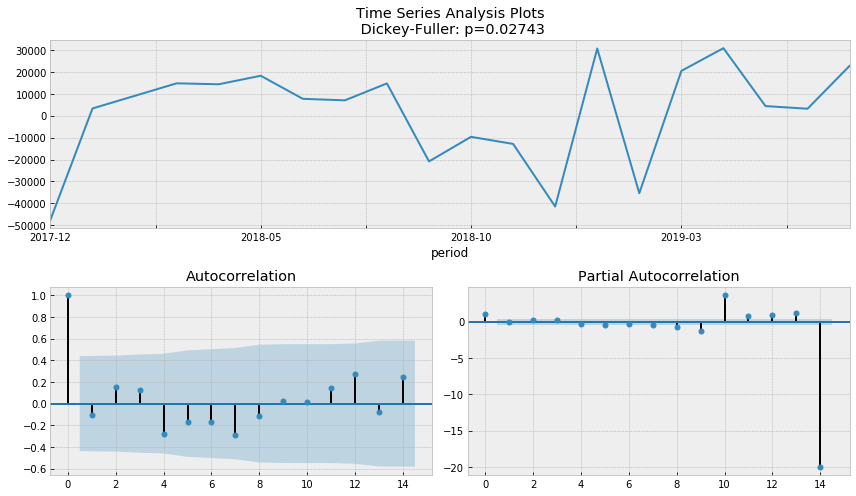

In [63]:
# fit model
model = ARIMA(y,order=(1,0,0))
model_ARIMA_fit = model.fit(disp=False)
model_ARIMA_forecast = model_ARIMA_fit.forecast(6)
model_ARIMA_fitted = model_ARIMA_fit.fittedvalues
model_ARIMA_resid = model_ARIMA_fit.resid
sl.tsplot(y=model_ARIMA_resid) 

Uma análise dos resíduos nos mostra que o modelo proposto (ARIMA(1,0,0)) satisfaz as hipóteses, já que o teste ADF para os residuos rejeita a hipótese nula de não estacionaridade dos resíduos e aparentemente não existe autocorrelação. Sendo assim esse será  modelo ARIMA usado para o forecast. Vamos verificar como o modelo performa na base de teste.

In [64]:
# test ARIMA model in holdout sample
model_v = ARIMA(X_train['Internações'],order=(1,0,0))
model_v_fit = model_v.fit()
y_pred = model_v_fit.forecast(X_test.shape[0])[0]
print(str(round(sl.mape_error(X_test['Internações'],y_pred),2))+"%");


1.63%


O modelo proposto apresentou um MAPE de 1.63% para a base de teste. Vale ressaltar que utilizamos um holdout sample de apenas 2 períodos. Não é o ideal já que queremos prever 6 meses, porém dado a limitação na quantidade de dados optamos por usar apenas 2 períodos.
Vamos testar rapidamente como performar um modelo de suavização exponencial. Paro modelo de suavização exponencial vamos fazer um grid search tendo como métrica para selecionar o melhor modelo o menor MAPE na nossa base de teste (holdout sample). Vamos testar diferentes formulações do modelo Holt-winter, variando os parâmetros de tendência (sem tendência, aditiva e multipliva), sazonalidade (sem sazonalidade, aditiva e multipliva) e qual o periodo da sazonalidade. O grid search também avalia modelos com transformação box-cox e modelos sem viés (onde, nesse caso, E[erros]=0)

In [65]:
best_model, best_mape, errors, best_config = sl.grid_seacrh_ets(X_train['Internações'], X_test['Internações'])
print(str(round(best_mape,2))+"%")
print(best_model.params)
print(best_config)

0.34%
{'smoothing_level': 0.7368421052631579, 'smoothing_slope': nan, 'smoothing_seasonal': 0.2631578947368421, 'damping_slope': nan, 'initial_level': 3.673716010808365e+61, 'initial_slope': nan, 'initial_seasons': array([-1.29359950e+61, -7.65219248e+60, -1.32932984e+60]), 'use_boxcox': True, 'lamda': 10.44636766339262, 'remove_bias': False}
[None, 'add', 3, True, False]


   O model de suavização exponencial performou muito bem na base de teste, com um MAPE de apenas 0.34% (lembrando que nossa holdout sample é de apenas 2 períodos). O modelo que melhor performou, tem sazonalidade aditiva com periodicidade de 3 meses e também usa transformação box-cox.
   
   Como o modelo de suavização exponencial performou consideravelmente melhor que nosso modelo ARIMA, ele será nosso modelo escolhido para o forecast do número de internações. 
    
   Abaixo temos o gráfico com o fit e o forecast de ambos modelos.

In [66]:
model_ets = ExponentialSmoothing(y, 
                             trend=best_config[0], 
                             seasonal=best_config[1], 
                             seasonal_periods=best_config[2])
model_ets_fit = model_ets.fit(optimized=True, 
                              use_boxcox=best_config[3], 
                              remove_bias=best_config[4])
model_ets_forecast = model_ets_fit.forecast(6)

In [107]:
#put all results in dataframes and plot forecast, fitted models and series

forecast = {'Internacoes_ARIMA_forecast':model_ARIMA_forecast[0],
            'Internacoes_HW_forecast':np.array(model_ets_forecast)}
fitted = {'Internacoes_ARIMA_fitted':np.array(model_ARIMA_fitted),
            'Internacoes_HW_fitted':np.array(model_ets_fit.fittedvalues)}

df_internacoes_fitted = pd.DataFrame(fitted, index=model_ets_fit.fittedvalues.index)
df_internacoes_forecast = pd.DataFrame(forecast, index=model_ets_forecast.index)


ValueError: Shape of passed values is (19, 2), indices imply (20, 2)

## Óbitos

A segunda série a ser estimada é a de óbitos. Testaremos mais uma vez os dois tipos de modelos.

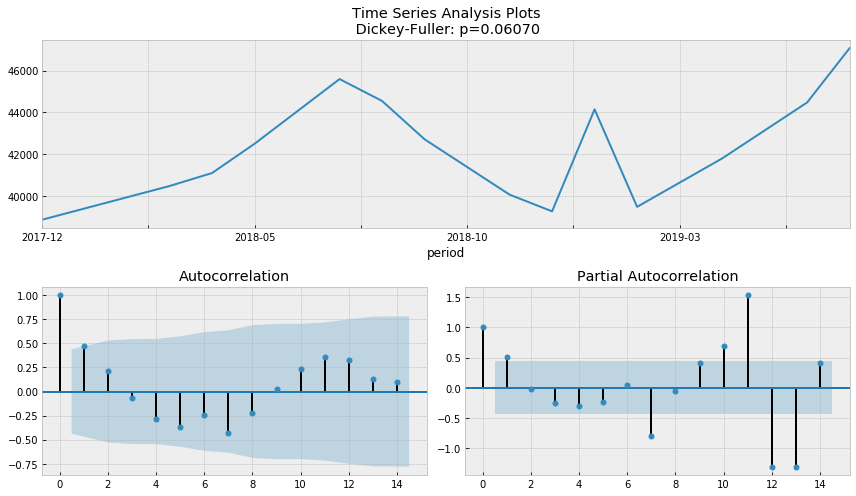

In [37]:
# ARIMA Model for Óbitos
y=X['Óbitos']
sl.tsplot(y=y)

O teste ADF indica a presença de raiz unitária. Sendo assim, vamos tirar a primeira diferença da série para tentar torna-la estacionária.

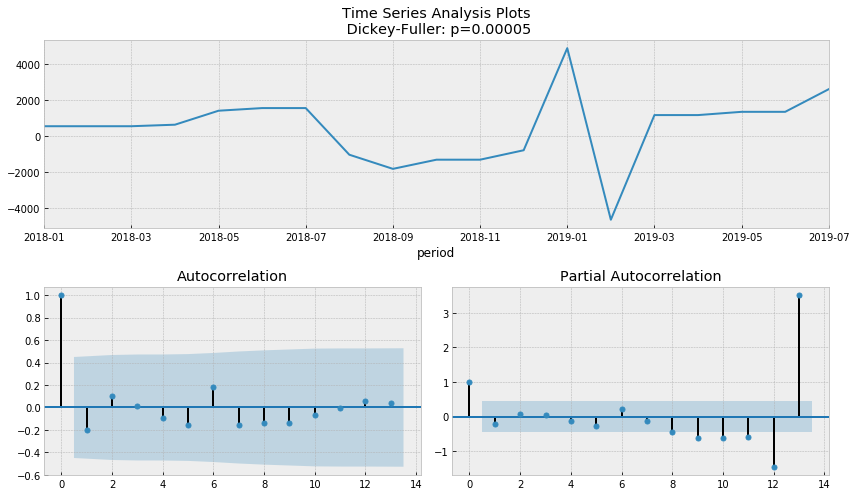

In [38]:
sl.tsplot(y=y.diff().dropna())

Tomar a primeira diferença da séria a tornou estacionária (de acordo com o resultado do teste ADF). Os gráficos de ACF e PACF indicam um modelo ARIMA(0,1,0).

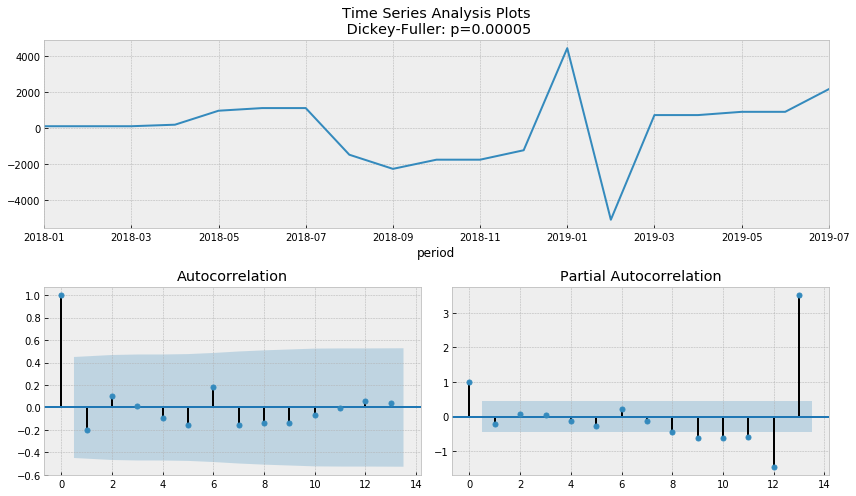

In [39]:
model = ARIMA(y,order=(0,1,0))
model_ARIMA_fit = model.fit(disp=False)
model_ARIMA_forecast = model_ARIMA_fit.forecast(6)
model_ARIMA_fitted = model_ARIMA_fit.fittedvalues
model_ARIMA_resid = model_ARIMA_fit.resid
sl.tsplot(y=model_ARIMA_resid)

Aparentemente o modelo cumpre com os requisitos teórico e seus resíduos não apresentam autocorrelação. Seria importante também testa a hipótese de normalidade dos resíduos.
Vamos testar agora a performance do modelo na base de test.

In [76]:
# test ARIMA model in holdout sample
model_v = ARIMA(X_train['Óbitos'],order=(0,1,0))
model_v_fit = model_v.fit()
y_pred = model_v_fit.forecast(X_test.shape[0])[0]
print(str(round(sl.mape_error(X_test['Óbitos'],y_pred),2))+"%");

4.86%


O modelo apresentou um MAPE de 4.68%. Vamos testar os modelos de suavização exponencial.

In [77]:
best_model, best_mape, errors, best_config = sl.grid_seacrh_ets(X_train['Óbitos'], X_test['Óbitos'])
print(str(round(best_mape,2))+"%")
print(best_model.params)
print(best_config)

1.08%
{'smoothing_level': 0.10526315789473684, 'smoothing_slope': 0.10526315789473684, 'smoothing_seasonal': 0.894736842105263, 'damping_slope': nan, 'initial_level': 39080.999999991735, 'initial_slope': 1.0014335294652918, 'initial_seasons': array([-200.        ,  336.33333333,  872.66666667, 1409.        ,
       2030.        , 3427.        , 4970.5       , 6514.        ,
       5469.        , 3639.        , 2318.        ,  997.        ]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
['mul', 'add', None, False, False]


O modelo de suavização exponencial performou muito melhor que o modelo ARIMA na base de teste. O MAPE do modelo foi de 1.08%. O modelo escolhido possui tendência multiplicativa e sazonalidade aditiva. Vamos gerar os resultados e os gráficos para a série da variável 'Óbitos'. 

In [85]:
model_ets = ExponentialSmoothing(y, 
                             trend=best_config[0], 
                             seasonal=best_config[1], 
                             seasonal_periods=best_config[2])
model_ets_fit = model_ets.fit(optimized=True, 
                              use_boxcox=best_config[3], 
                              remove_bias=best_config[4])
model_ets_forecast = model_ets_fit.forecast(6)
#put all results in dataframes and plot forecast, fitted models and series

forecast = {'obitos_ARIMA_forecast':model_ARIMA_forecast[0],
            'obitos_HW_forecast':np.array(model_ets_forecast)}
fitted = {'obitos_ARIMA_fitted':np.array(model_ARIMA_fitted),
            'obitos_HW_fitted':np.array(model_ets_fit.fittedvalues)}

df_obitos_fitted = pd.DataFrame(fitted, index=model_ets_fit.fittedvalues.index)
df_obitos_forecast = pd.DataFrame(forecast, index=model_ets_forecast.index)

## Valor_médio_AIH

A última série a ser modelada é a de Valor_médio_AIH.

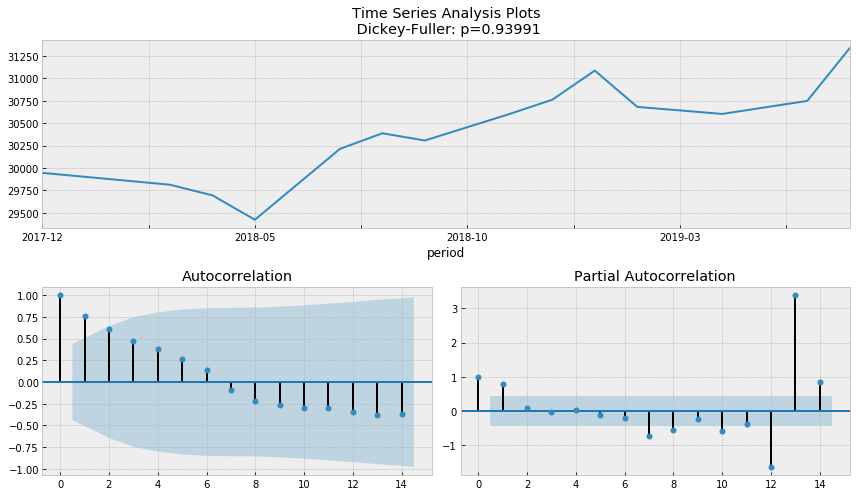

In [88]:
# ARIMA Model for Valor_médio_AIH
y=X['Valor_médio_AIH']
sl.tsplot(y=y)

A série é claramente não estacionária, tal fato é suportado pelo teste ADF. Sendo assim vamos tirar a primeira diferença, e ver se conseguimos deixar a série estacionária.

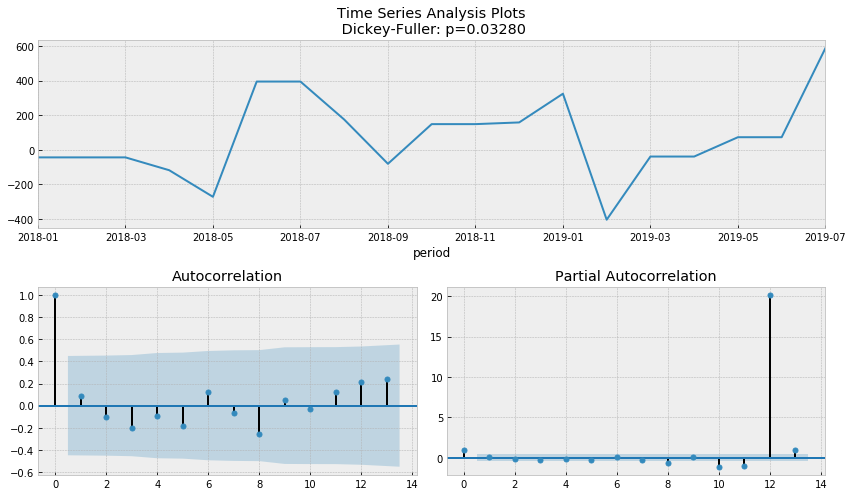

In [91]:
sl.tsplot(y=y.diff().dropna())

Tirar a primeira diferença tornou a série estacionária. Os gráficos de ACF e PACF indicam que um possível modelo seria um ARIMA(0,1,0). Vamos testar esse modelo na base de test. 

In [101]:
# test ARIMA model in holdout sample
model_v = ARIMA(X_train['Valor_médio_AIH'],order=(0,1,0))
model_v_fit = model_v.fit()
y_pred = model_v_fit.forecast(X_test.shape[0])[0]
print(str(round(sl.mape_error(X_test['Óbitos'],y_pred),2))+"%");

32.79%


A performance to modelo na base de teste é muito ruim. Possivelmente o modelo está mal específicado, ou o processo gerador não pode ser representado por um ARIMA. Vamos testar os modelos de suavização exponencial.

In [104]:
best_model, best_mape, errors, best_config = sl.grid_seacrh_ets(X_train['Valor_médio_AIH'], X_test['Valor_médio_AIH'])
print(str(round(best_mape,2))+"%")
print(best_model.params)
print(best_config)

0.51%
{'smoothing_level': 0.9999999993531198, 'smoothing_slope': nan, 'smoothing_seasonal': 0.0, 'damping_slope': nan, 'initial_level': 30354.065000000002, 'initial_slope': nan, 'initial_seasons': array([0.99226897, 0.99007041, 0.98366385, 0.98221473, 0.97832069,
       0.96935682, 0.98235705, 0.99535729, 1.00112192, 0.99845078,
       1.00333892, 0.99779903]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[None, 'mul', None, False, False]
